{% include toc title="On This Page" icon="file-text" %}

<div class='notice--success' markdown="1">

## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives

After completing this chapter, you will be able to:

* Iterate through multiple directories to access data within.
* Nest loops in each other to run more complicated loops.
* Use for loops to combine multiple datasets into one **Pandas** `DataFrame`.

 
</div>

## Build a Data Workflow 

Often, the data that you need for your workflow is messy and sometimes 
difficult to access. It can be spread out over multiple files in many 
directories. Manually processing data in multiple files and directories 
manually is time consuming. It can be much easier to automate the process in 
**Python** with `for` loops! This lesson will cover using loops to automate 
data workflows where you have many different files that you need to work with.

In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import earthpy as et

# Download data on average monthly temp for two California sites
file_url = "https://ndownloader.figshare.com/files/21894528"
data_path = et.data.get_data(url=file_url)
data_path

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME,
                      "earth-analytics",
                      "data",
                      "earthpy-downloads"))

In [2]:
# List directories for the data
os.listdir(data_path)

['San-Diego', 'Sonoma']

The data downloaded above contain temperature data for two cities in California, 
USA: Sonoma and San Diego. Within each directory you will find temperature
data for the year stored in individual **.csv** files. Like this:


```
Sonoma-1999-temp.csv
Sonoma-2000-temp.csv
Sonoma-2001-temp.csv
```

Your analysis goal is to create a plot of temperature across all years that you
have data for in both locations. To create this plot, you will need to:

1. open each file
2. combine the data for each year into a single dataframe
3. add an attribute that specifies the location and year to the `data.frame` 

The above steps will allow you to summarize the plot the data.

### Explore Your Data Using Loops

It's normal to open and look at your directory structure after you download new data.
You can, however, also explore the data using `glob` to list directories and files 
within each directory. To begin, create a list of all the directories in your 
new download directory. If you remember from <a href="{{ site.baseurl }}/courses/intro-to-earth-data-science/python-code-fundamentals/work-with-files-directories-paths-in-python/os-glob-manipulate-file-paths/">Chapter 12 of this textbook, </a> you can use `glob` to create a list of files that match 
certain criteria. You can then iterate through those lists with `for` loops to
perform an operation on each file.

Here, you create a list using `glob` of all of the folders in the data you 
downloaded, and then iterate through that list with a `for` loop to print 
out the name of each folder within the main directory.

In [3]:
# Print all dirs found by glob
data_dirs = os.path.join(data_path, "*")
all_dirs = glob(data_dirs)

for a_dir in all_dirs:
    print(a_dir)

/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma


### Use `glob` Inside a `for` Loop

The folders printed out above are interesting, but they are not the files you 
want to work on. The files are another directory down, stored within the folders 
printed above. To access these files, you can use `glob` once again. Inside the 
`for` loop, you can use `glob` to create a list of all of the files within each 
folder in the original list. 

Below you can see two different lists printed, one with all of the files stored in 
the `San-Diego` folder, and one with all of the files stored in the `Sonoma` folder.

In [4]:
# Create lists inside a for loop
for a_dir in all_dirs:
    all_files = os.path.join(a_dir, "*")
    print(glob(all_files))

['/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv']
['/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv', '/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv', '/Users/elsa/earth-analytics/dat

### Nesting `for` Loops

Now that you've created another list inside of a `for` loop, you can loop 
through that list too! Below, you create the list of files inside each directory 
with `glob`, and then you loop through that list to print out each individual file. 

Nesting `for` loops is a powerful tool, but can also be computationally expensive. 
Each time the outer loop executes one cycle, the `for` loop that's nested inside must 
complete it's entire loop before the outer loop executes it's next cycle. You can nest 
as many `for` loops as you want, but it's good to keep this in mind. The more `for` 
loops that are nested, the longer each cycle of the outer `for` loop will take.

In [5]:
# Nesting for loops
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        print(a_file_path)

/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthl

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Assigning Variables in `for` Loops

When assigning variables in **Python**, overwriting a variable with new data 
can be useful to update values and make your code more legible. This can be useful 
in `for` loops too, but can easily be done by accident as well. Below, you see that 
for every file in the two folders that contain your data, the line `pd.read_csv()` 
is run, and assigned to the variable `data`. However, with each new cycle of the for 
loop, that variable is getting reassigned to a new file's data. 

You can see that even though you opened up and read every single file into **pandas**, 
the only data stored in the `data` variable is from the last file that was read, which 
happens to be the 2003 data from the Sonoma folder. 

To avoid this data being overwritten every cycle, a common work around is to create a 
list outside of the for loop, and append all of the values into that list. That way 
the `data` variable from each cycle will be stored in the list with the data from that 
cycle stored in it, preventing it from being overwritten. 

</div>

In [6]:
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    # Create a nested loop which loops through each directory
    for a_file_path in all_file_paths:
        print(a_file_path)
        # Read the file into a pandas dataframe and assign it to a variable
        temp_data_df = pd.read_csv(a_file_path)
temp_data_df

/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2002-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2003-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-1999-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2001-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego/San-Diego-2000-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2000-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2001-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-1999-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/Sonoma/Sonoma-2003-temp.csv
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthl

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4


### Combining Pandas Datasets in a List

**pandas** has a lot of functionality that makes modifying large amounts of 
data much easier. One such function is the `concat` function, which can be 
used to combine multiple **pandas** `DataFrames` stored in a list into one 
`DataFrame`. You can combine this functionality with a list of `DataFrames` 
created and added to a list in a `for` loop, and create a final `DataFrame` 
with all of the data stored in the directory structure.

In [7]:
# Create a list outside of the for loop to store data
all_df = []

for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Append the data to the list you made to prevent it from being overwritten
        all_df.append(temp_data_df)

# Combine all the dataframes stored in the all_df list into one pandas dataframe
pd.concat(all_df)

,Year,January,February,March,April,May,June,July,August,September,October,November,December
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4


### Extracting Data from Pathnames

Often times when data is stored in many directories, the name of the folder 
that the data is stored in can have useful information. Some examples of this include: 

1. The date the data was collected
2. The location where the data was collected
3. Physical attributes of the data
4. The resolution of the data

There are countless other examples of data that can be stored in a file pathname. 
Because of this, it can be useful to add data from a pathname to your 
data. 

In this example, the two folders that store all of the files contain useful 
information in the folder names. Specifically, the names, `San-Diego` and `Sonoma`, 
are indicative of where the data was collected. You can add this information to a new 
column in the **pandas** `DataFrames` you are creating.

<div class='notice--success alert alert-info' markdown="1">

<i class="fa fa-star"></i> **Data Tip:** Extracting Values from Pathnames

You can extract information from a path name in many ways. 
In this exercise, we use `os.path.basename()` to get our information, but
that is not always the best way to collect information from a path. This wouldn't
work if, for example, the infomation you wanted from a path wasn't last folder name 
in your pathname. For more ways to extract information from a path, see 
<a href="{{ site.baseurl }}/courses/intro-to-earth-data-science/python-code-fundamentals/work-with-files-directories-paths-in-python/os-glob-manipulate-file-paths/">this lesson modifying paths with `glob` and `os`.</a> 

</div>

You can extract the last folder name in your pathname by using `os.path.basename()`. 
This function will grab the last folder name in a pathname and return 
it as a string.

In [8]:
# Get the basename from a pathname

basename = os.path.basename(all_dirs[0])

print("The pathname without running os.path.basename():\n" + all_dirs[0])
print("\nThe infromation extracted from the pathname by os.path.basename():\n" + basename)

The pathname without running os.path.basename():
/Users/elsa/earth-analytics/data/earthpy-downloads/avg-monthly-temp-fahr/San-Diego

The infromation extracted from the pathname by os.path.basename():
San-Diego


In [9]:
# Read in filenames without modifying the pathnames

all_df = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Reading the pathname from each directory into the dataframe.
        # Notice how it reads in the entire pathname.
        temp_data_df["location"] = a_dir
        all_df.append(temp_data_df)

pd.concat(all_df)

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,/Users/elsa/earth-analytics/data/earthpy-downl...
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,/Users/elsa/earth-analytics/data/earthpy-downl...
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,/Users/elsa/earth-analytics/data/earthpy-downl...
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,/Users/elsa/earth-analytics/data/earthpy-downl...


In [10]:
# Read in filenames using os to modify the pathnames

all_df = []
for a_dir in all_dirs:
    dir_path = os.path.join(a_dir, "*")
    all_file_paths = (glob(dir_path))
    for a_file_path in all_file_paths:
        temp_data_df = pd.read_csv(a_file_path)
        # Read the pathname from each directory into the dataframe. 
        # Notice how it reads just the last folder name into the column now.
        temp_data_df["location"] = os.path.basename(a_dir)
        all_df.append(temp_data_df)

all_data = pd.concat(all_df)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma


### Plot Your Temperature Data

With the new column that specifies where the data was collected, you can use 
the **pandas** `groupby` function to plot a chart for each location! The `groupby` 
function will create a new plot for each unique entry in a column. Since there are 
two locations in the `location` column, you can produce two graphs, one for each location. 

Below, you can create a new column that is the mean of all of the monthly readings for 
the average temperature in each location. With that column, you can plot the average 
annual temperature of each location by year using the `groupby` function.

In [11]:
# Creating a dataframe that is just the columns for temperature from each month.
just_monthly_data_df = all_data.loc[:, "January":"December"]

# Get the average of each row in that dataframe and assigning the output to a new column in the original dataframe
all_data['annual_average_temp'] = just_monthly_data_df.mean(axis=1)
all_data

,Year,January,February,March,April,May,June,July,August,September,October,November,December,location,annual_average_temp
0,2002,63.0,66.2,63.6,63.7,66.1,68.7,71.8,73.4,75.5,68.4,71.4,63.7,San-Diego,67.958333
0,2003,71.4,64.6,66.5,65.2,66.9,67.4,74.3,77.5,74.0,73.1,67.4,64.6,San-Diego,69.408333
0,1999,65.2,64.9,63.6,64.6,64.4,66.9,72.7,72.7,71.4,77.7,67.4,67.6,San-Diego,68.258333
0,2001,62.2,61.7,63.7,63.6,67.5,72.0,73.0,73.5,73.2,71.1,66.9,63.3,San-Diego,67.641667
0,2000,65.8,65.3,63.7,67.7,69.1,72.4,73.5,76.3,75.5,69.5,66.0,66.9,San-Diego,69.308333
0,2000,56.8,58.0,64.8,69.5,75.0,79.5,81.4,83.7,83.4,71.8,60.7,58.5,Sonoma,70.258333
0,2001,56.5,58.4,68.0,66.7,83.1,86.1,81.2,85.3,81.0,78.4,64.0,55.6,Sonoma,72.025000
0,1999,56.1,56.6,58.7,68.3,72.7,80.6,80.9,82.9,81.3,79.1,64.2,61.5,Sonoma,70.241667
0,2003,58.9,61.8,66.4,61.5,74.2,81.1,87.0,83.5,85.0,82.7,61.0,56.4,Sonoma,71.625000
0,2002,55.8,62.9,63.5,66.9,74.5,84.2,82.8,82.1,84.5,75.7,67.6,57.4,Sonoma,71.491667


In [12]:
# Sort the data by year for nicer plotting
all_data.sort_values("Year", inplace=True)

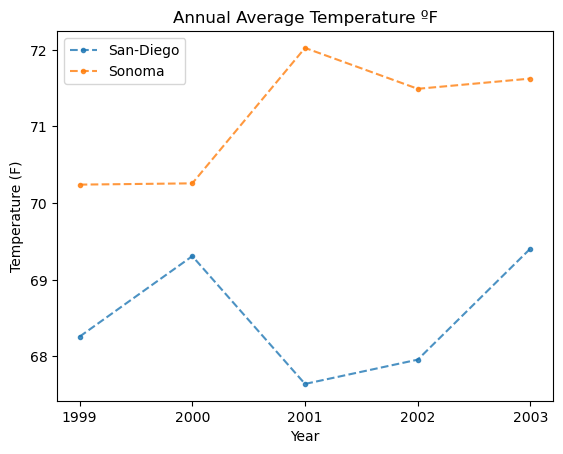

In [13]:
f, ax = plt.subplots()
for title, group in all_data.groupby('location'):
    group.groupby('location').plot(x='Year', 
                                   y='annual_average_temp',
                                   title="Annual Average Temperature ºF",
                                   label=title,
                                   style='.--',
                                   ax=ax, 
                                   alpha=.8)

    
ax.set(xlabel="Year", ylabel="Temperature (F)", xticks=[1999, 2000, 2001, 2002, 2003])

plt.show()

<div class="notice--warning" markdown="1">

## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge 1: Plot Temperature by Maximum Value

Above, you summarized the year by the average temperature for each year, plotted the 
two locations to compare their average annual temperatures. In this challenge, plot 
the maximum annual temperature for each location annually. Your graph should look 
similar to the one above, but it should display the maximum annual temperature instead 
of the average. You can use a similar method to getting the average to get the maximum 
temperature. Using `max` instead of `mean` of the `just_monthly_data_df` should return 
a series of data that's the maximum values, which you can then assign to a column in the 
main dataframe and plot like above.  
</div>

In [14]:
# Create data and plot answer here

In [15]:
# Get the average of each row in that dataframe and assigning the output to a new column in the original dataframe
all_data['annual_maximum_temp'] = just_monthly_data_df.max(axis=1)

# Sort data again
all_data.sort_values("Year", inplace=True)

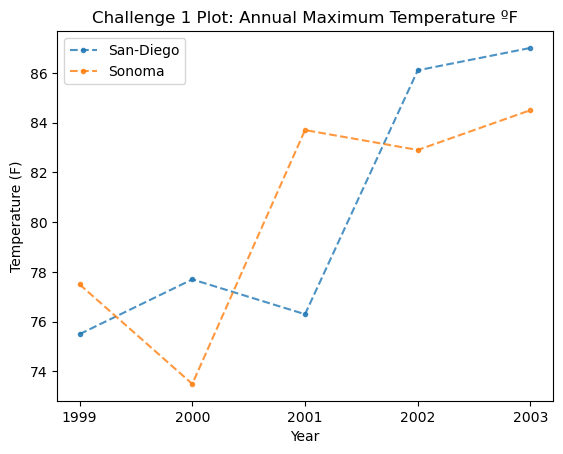

In [16]:
f, ax = plt.subplots()
for title, group in all_data.groupby('location'):
    group.groupby('location').plot(x='Year', 
                                   y='annual_maximum_temp',
                                   title="Challenge 1 Plot: Annual Maximum Temperature ºF",
                                   label=title,
                                   style='.--',
                                   ax=ax, 
                                   alpha=.8)
    
ax.set(xlabel="Year", ylabel="Temperature (F)", xticks=[1999, 2000, 2001, 2002, 2003])

plt.show()